## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [21]:
! git clone https://www.github.com/DS3001/assignment3



Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 4.82 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [4]:
! git clone https://www.github.com/DS3001/assignment3



fatal: destination path 'assignment3' already exists and is not an empty directory.


In [27]:
#1.1
import pandas as pd
df = pd.read_csv('./assignment3/data/car_data.csv')
print(df.columns)
df.head

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


<bound method NDFrame.head of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [11]:
#1.2
df.describe()
df['Gender'].value_counts()


Female    516
Male      484
Name: Gender, dtype: int64

In [18]:
df['x'] = 0
df.loc[df['Gender'] == 'Female', 'x'] = 1
df['x'].value_counts()


1    516
0    484
Name: x, dtype: int64

In [19]:
vars = ['Age', 'AnnualSalary']
X = df.loc[:,vars]
y = df['Purchased']

In [28]:
#1.3
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [29]:
#1.4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

[ 6 16]


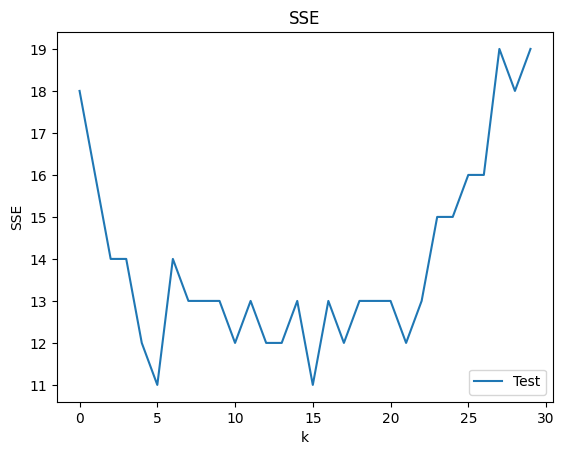

In [26]:
#1.5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k]=np.sum((y_test-y_hat)**2)
SSE_min=np.min(SSE)
min_index=np.where(SSE==SSE_min)
k_star=k_grid[min_index]
print(k_star)
plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()



> the optimal k appears to be around 5





In [30]:
#1.6
model=KNeighborsClassifier(n_neighbors=5)
fitted_model=model.fit(X_train,y_train)
y_hat=fitted_model.predict(X_test)
pd.crosstab(y_test,y_hat)

col_0,0,1
Purchased,,
0,118,7
1,5,70




> The majority of cases were predicted correctly. There were 7 times when 0 was classified as 1 and 5 times when 1 was classified as 0. The overall accuracy rate was 94% (188/200*100%)


In [33]:
#1.7
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X=df.loc[:,vars]
y=df['Purchased']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

model=KNeighborsClassifier(n_neighbors=9)
fitted_model=model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat=fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[X_test['Gender']=='Male']
y_hat_F=y_hat[X_test['Gender']=='Female']
y_M=y_test[X_test['Gender']=='Male']
y_F=y_test[X_test['Gender']=='Female']
pd.crosstab(y_F,y_hat_F)


col_0,0,1
Purchased,,
0,56,6
1,12,35


In [34]:
pd.crosstab(y_M,y_hat_M)


col_0,0,1
Purchased,,
0,58,5
1,10,18




> For women, 91/96 = 0.948 are correct, while for men, 76/104 = 0.731 are correct. The model makes more accurate predictions for females by approximately 0.217. It is important to look for ways to improve accuracy for the group that gets worse treatement in order to improve fairness.



**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [23]:
#2.1
import pandas as pd

df = pd.read_csv('./assignment3/data/USA_cars_datasets.csv')

selected_vars = ['price', 'year', 'mileage']
df = df[selected_vars]

missing_values = df.isnull().sum()
if missing_values.any():
    df.dropna(inplace=True)

print(df.head())

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Number of rows: 2499
Number of columns: 3


In [25]:
#2.2
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
df['year']=maxmin(df['year'])
df['mileage']=maxmin(df['mileage'])
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2499.000000
mean,18767.671469,0.930091,0.051377
std,12116.094936,0.073248,0.058654
min,0.000000,0.000000,0.000000
25%,10200.000000,0.914894,0.021088
50%,16900.000000,0.957447,0.034742
75%,25555.500000,0.978723,0.062354
max,84900.000000,1.000000,1.000000


In [27]:
#2.3
from sklearn.model_selection import train_test_split
X=df[['year','mileage']]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

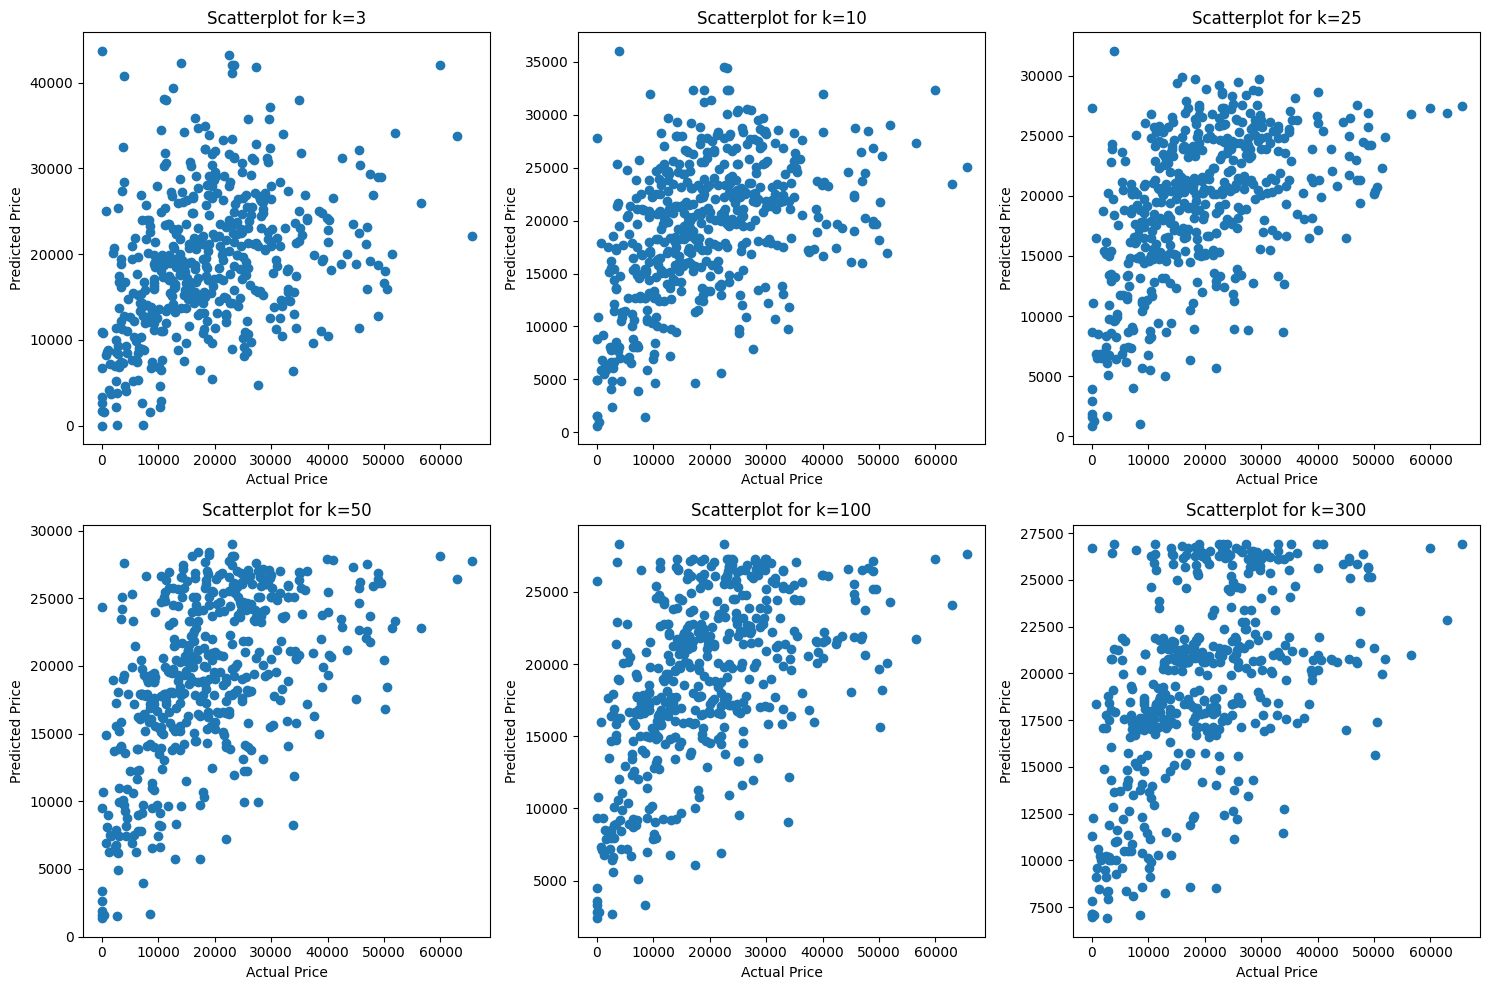

Sum of Squared Error (SSE) for each k:
k=3: SSE=72032294950.55556
k=10: SSE=58525872121.93001
k=25: SSE=54338576525.1024
k=50: SSE=53719560383.1944
k=100: SSE=53526269447.2881
k=300: SSE=54924218768.55986


In [28]:
#2.4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
sse_per_k = {}

plt.figure(figsize=(15, 10))

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)

    y_pred = knn_reg.predict(X_test)

    # Compute the Sum of Squared Error (SSE)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)
    sse_per_k[k] = sse

    # Scatterplot for predicted vs. actual price
    plt.subplot(2, 3, k_values.index(k) + 1)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Scatterplot for k={k}')

plt.tight_layout()
plt.show()

print("Sum of Squared Error (SSE) for each k:")
for k, sse in sse_per_k.items():
    print(f"k={k}: SSE={sse}")





>  Smaller k values result in SSE, indicating potential overfitting to noise. As k increases (k=10 to k=100), SSE decreases, reflecting better generalization. However, for k=300, SSE slightly rises, suggesting potential underfitting.



2.5

>  The optimal balance between complexity and accuracy seems to be around k=100.



2.6


> As k increases, the plots displayed a clear trend. For smaller k values (e.g., k=3), there was overfitting with high variability and erratic patterns. In the mid-range (k=10 to k=100), the plots showed a smoother trend, indicating a balanced fit. However, for larger k values (e.g., k=300), underfitting occurred with overly simplistic predictions and reduced accuracy. The optimal balance, which minimizes overfitting and underfitting, appears to be k=100.




**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [1]:
#6.1
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

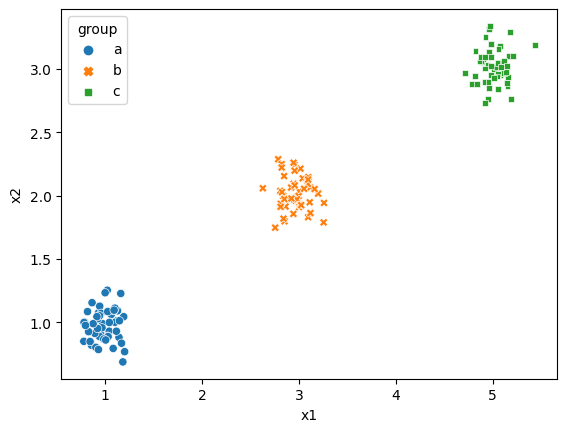

In [2]:
#6.2
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

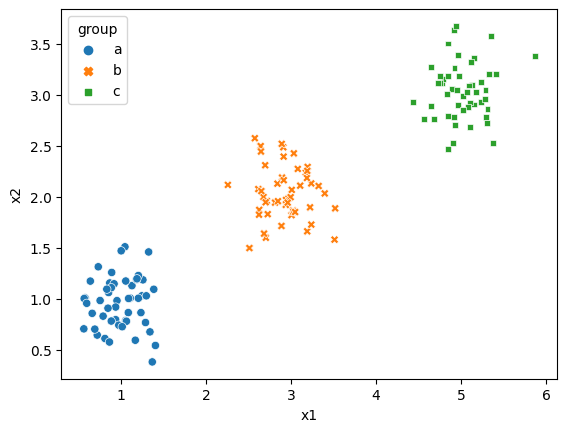

In [3]:
sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

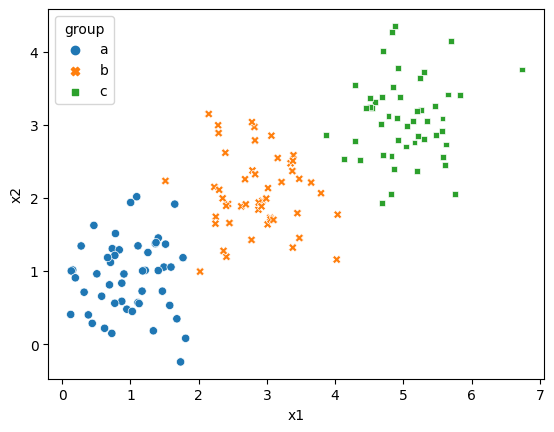

In [4]:
sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

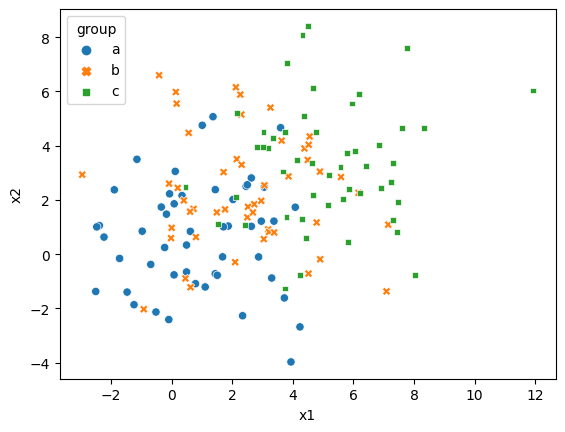

In [5]:
sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group',style='group')

As the noise goes up, the clusters spread out and collide. Noise = 0.5 is when the distictness of the clusters starts to go away. By noise = 2.0,it's impossible to guess which cluster a given point belongs to.

In [13]:
#6.3
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
def scree(data):
  X=data.loc[:,['x1','x2']]
  X=X.apply(maxmin)
  k_bar=15
  k_grid=np.arange(1,k_bar+1)
  SSE=np.zeros(k_bar)
  for k in range(k_bar):
    model=KMeans(n_clusters=k+1,max_iter=300,n_init=10,random_state=0)
    model=model.fit(X)
    SSE[k]=model.inertia_
  scree_plot,axes=plt.subplots()
  sns.lineplot(x=k_grid,y=SSE).set_title('Scree Plot')
  axes.set_ylim(0,35)

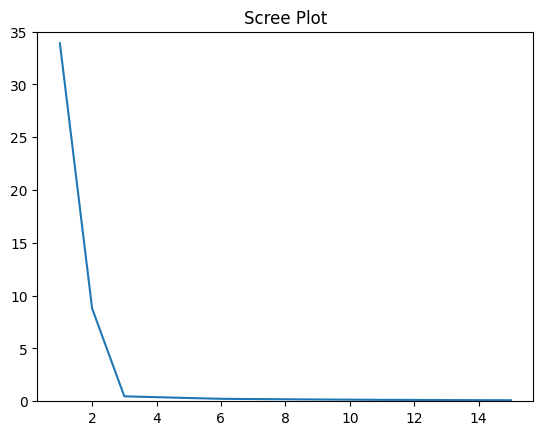

In [14]:
scree(data = df0_125)



> elbow at k=3



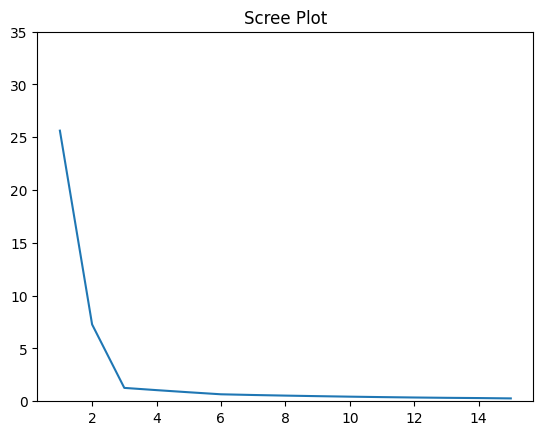

In [15]:
scree(data=df0_25)



> elbow at k=3



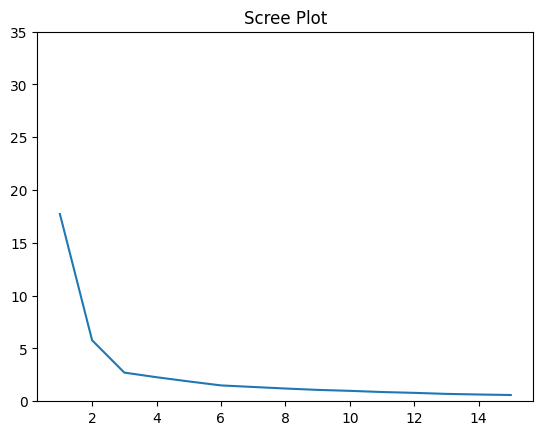

In [16]:
scree(data=df0_5)



> elbow at k=3



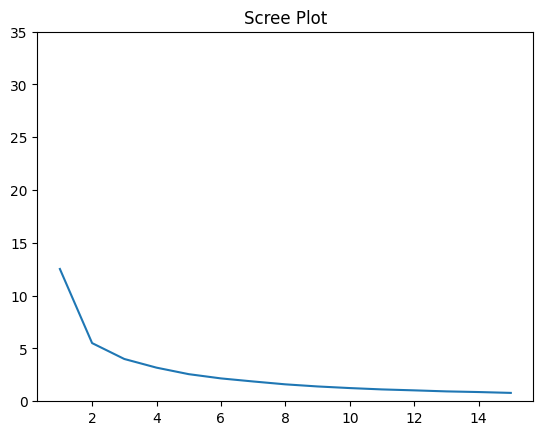

In [17]:
scree(df1_0)



> potential elbow at k=2


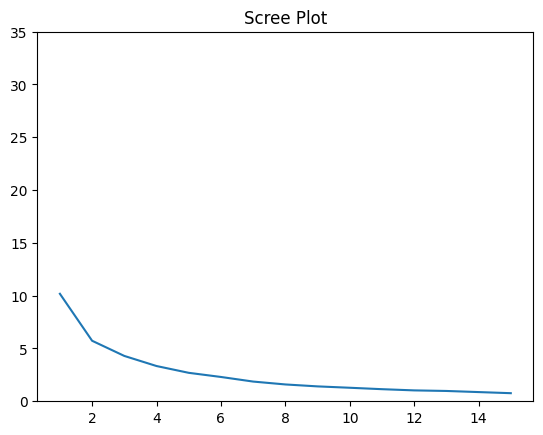

In [18]:
scree(df2_0)

existence/position of elbow is unclear

6.4

> If the gorups are seperate and distinct, the marginal benefit of an additional cluster is significant because you capture a big drop in SSE. As the noise increases, the groups will spread out and eventually become visually indistinct. Despite our understanding that points located in the upper right are likely associated with cluster c, and points in the bottom left are probably from cluster a, the substantial overlap between these groups has rendered it increasingly ambiguous to determine the optimal number of clusters or to definitively assign data points to specific clusters. Consequently, the stability of the clustering may be uncertain, and it might not effectively reveal underlying heterogeneity. In cases where clusters exhibit clear separation and visual distinction, the scree plot method will be effective, resulting in a discernible elbow point. Conversely, when dealing with a dense cloud of data points, the scree plot will appear smooth, making it challenging to identify a distinct elbow point.







**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?